# Data Manipulation 1

In [1]:
import pandas as pd

In [2]:
countries_df = pd.read_csv('top_10_countries.csv')

In [3]:
# The shape attribute returns the shape of a DataFrame
countries_df.shape

(10, 6)

In [4]:
# The columns attribute returns a list of the column names
countries_df.columns

Index(['Rank', 'Country / Dependency', 'Region', 'Population', '% of world',
       'Date'],
      dtype='object')

In [5]:
# The index attribute returns the index details
countries_df.index

RangeIndex(start=0, stop=10, step=1)

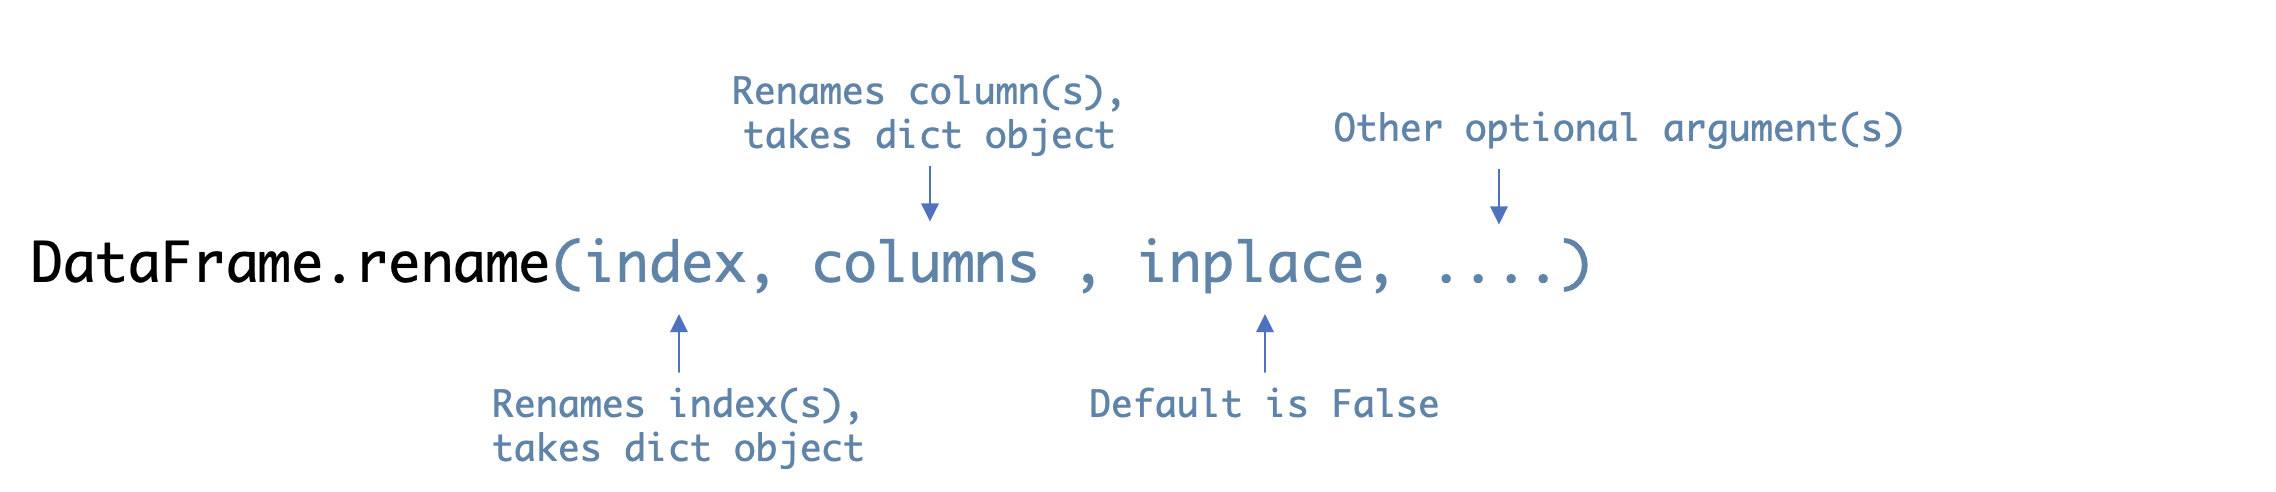

In [6]:
# using the rename method to rename one of the columns
countries_df.rename(columns={'Country / Dependency': 'Country'}, inplace=True)

In [7]:
countries_df

Rank         Country    Region  Population % of world       Date
0     1           China      Asia  1412600000     17.80%  31-Dec-21
1     2           India      Asia  1386946912     17.50%  18-Jan-22
2     3   United States  Americas   333073186      4.20%  18-Jan-22
3     4       Indonesia      Asia   271350000      3.42%  31-Dec-20
4     5        Pakistan      Asia   225200000      2.84%  01-Jul-21
5     6          Brazil  Americas   214231641      2.70%  18-Jan-22
6     7         Nigeria    Africa   211401000      2.67%  01-Jul-21
7     8      Bangladesh      Asia   172062576      2.17%  18-Jan-22
8     9          Russia    Europe   146171015      1.84%  01-Jan-21
9    10          Mexico  Americas   126014024      1.59%  02-Mar-20

In [8]:
#This is an alternative way to rename the column, but unlike the previous option it takes 3 arguments vs 2
#countries_df.drop(labels='Date',axis=1,inplace=True)

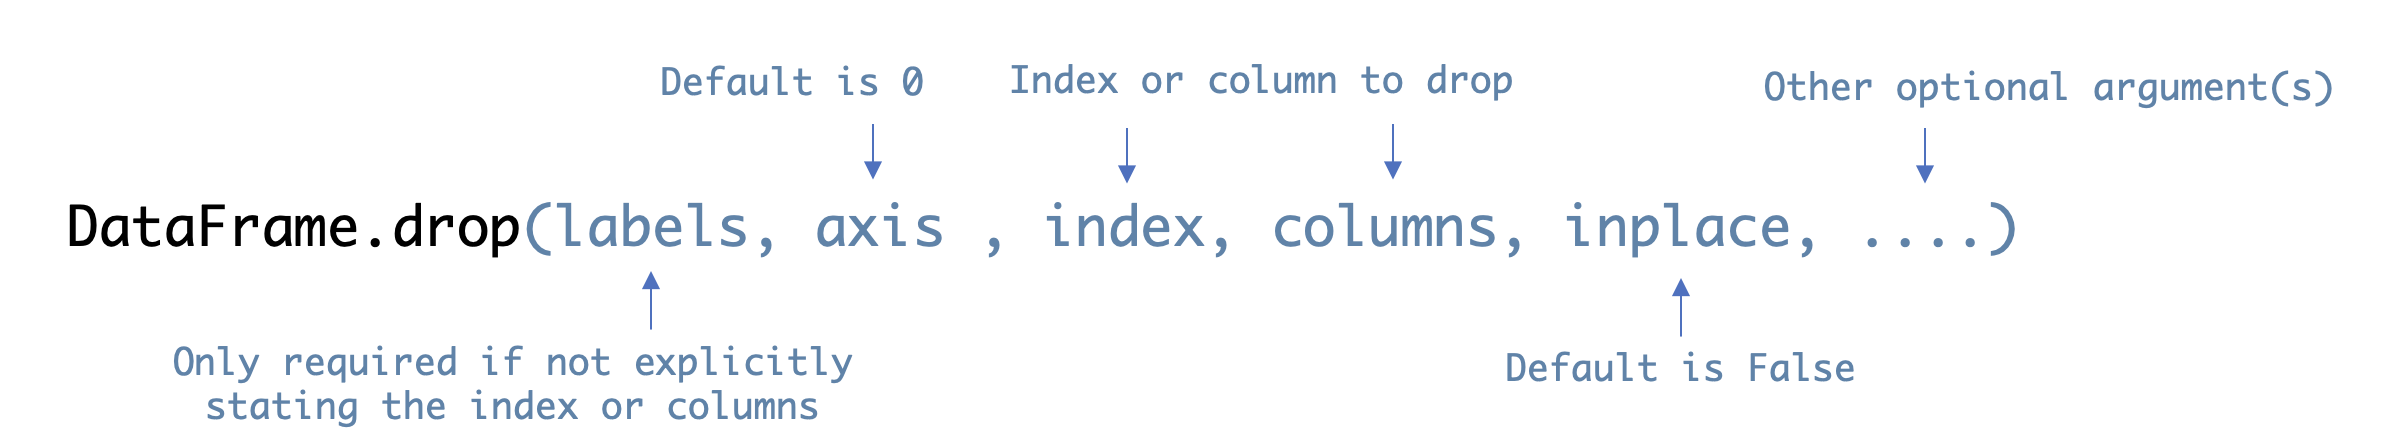

In [9]:
# Using the drop method to drop the 'Date' columns
countries_df.drop(columns='Date', inplace=True)

In [10]:
countries_df

Rank         Country    Region  Population % of world
0     1           China      Asia  1412600000     17.80%
1     2           India      Asia  1386946912     17.50%
2     3   United States  Americas   333073186      4.20%
3     4       Indonesia      Asia   271350000      3.42%
4     5        Pakistan      Asia   225200000      2.84%
5     6          Brazil  Americas   214231641      2.70%
6     7         Nigeria    Africa   211401000      2.67%
7     8      Bangladesh      Asia   172062576      2.17%
8     9          Russia    Europe   146171015      1.84%
9    10          Mexico  Americas   126014024      1.59%

In [11]:
# Dividing the population by 1 million and rounding to 2dp, reassining to new column
countries_df['Population (millions)']=  round(countries_df['Population']/1000000,2)

In [12]:
countries_df

Rank         Country    Region  Population % of world  \
0     1           China      Asia  1412600000     17.80%   
1     2           India      Asia  1386946912     17.50%   
2     3   United States  Americas   333073186      4.20%   
3     4       Indonesia      Asia   271350000      3.42%   
4     5        Pakistan      Asia   225200000      2.84%   
5     6          Brazil  Americas   214231641      2.70%   
6     7         Nigeria    Africa   211401000      2.67%   
7     8      Bangladesh      Asia   172062576      2.17%   
8     9          Russia    Europe   146171015      1.84%   
9    10          Mexico  Americas   126014024      1.59%   

   Population (millions)  
0                1412.60  
1                1386.95  
2                 333.07  
3                 271.35  
4                 225.20  
5                 214.23  
6                 211.40  
7                 172.06  
8                 146.17  
9                 126.01

In [13]:
# Concatenating the values of two string columns to create a new column
countries_df['Country / Region'] = countries_df['Country']+' / '+ countries_df['Region']

In [14]:
countries_df

Rank         Country    Region  Population % of world  \
0     1           China      Asia  1412600000     17.80%   
1     2           India      Asia  1386946912     17.50%   
2     3   United States  Americas   333073186      4.20%   
3     4       Indonesia      Asia   271350000      3.42%   
4     5        Pakistan      Asia   225200000      2.84%   
5     6          Brazil  Americas   214231641      2.70%   
6     7         Nigeria    Africa   211401000      2.67%   
7     8      Bangladesh      Asia   172062576      2.17%   
8     9          Russia    Europe   146171015      1.84%   
9    10          Mexico  Americas   126014024      1.59%   

   Population (millions)           Country / Region  
0                1412.60               China / Asia  
1                1386.95               India / Asia  
2                 333.07   United States / Americas  
3                 271.35           Indonesia / Asia  
4                 225.20            Pakistan / Asia  
5                 214.23          Brazil / Americas  
6                 211.40           Nigeria / Africa  
7                 172.06          Bangladesh / Asia  
8                 146.17            Russia / Europe  
9                 126.01          Mexico / Americas

In [15]:
# Adding two columns together will result in an error if they are incompatable data types
#countries_df['Country']+ countries_df['Population']

In [16]:
# use the dtypes attribute to return the data types of all columns in a DataFrame
countries_df.dtypes

Rank                       int64
Country                   object
Region                    object
Population                 int64
% of world                object
Population (millions)    float64
Country / Region          object
dtype: object

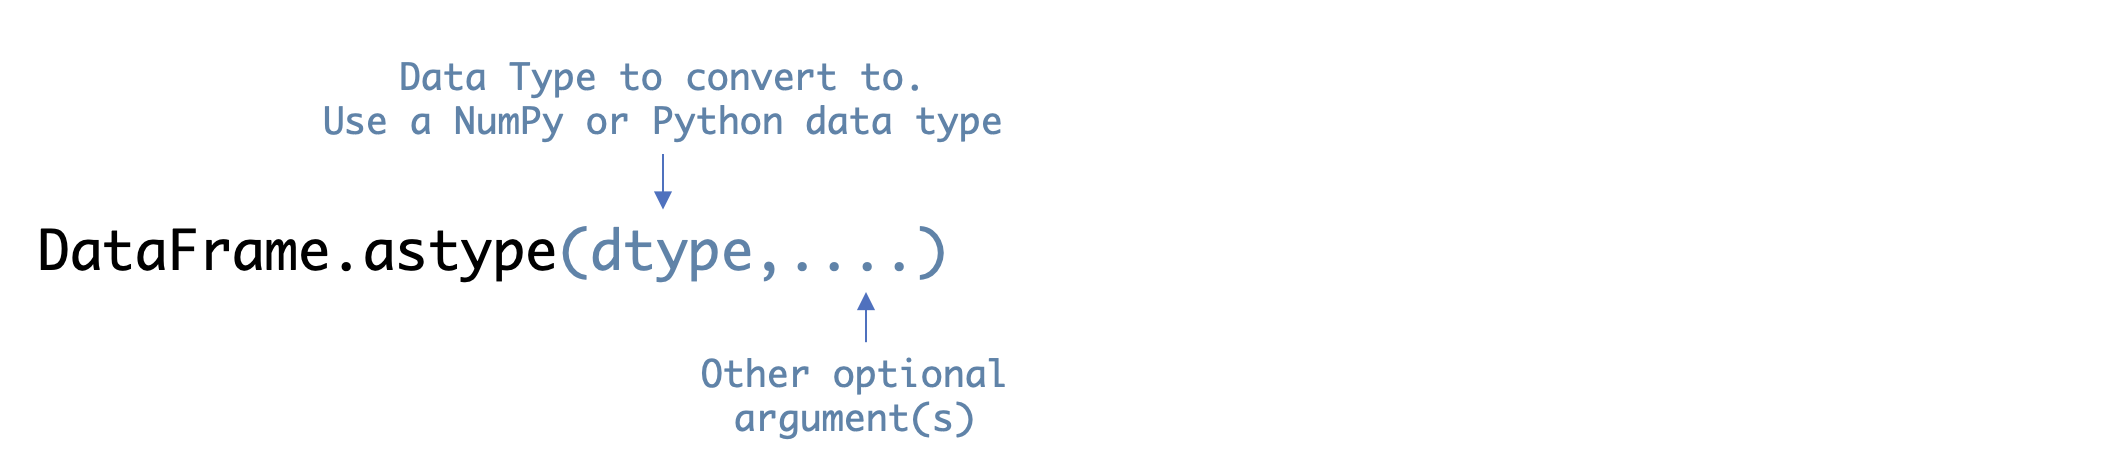

In [17]:
#This will return an error due to the format of the values
#countries_df['% of world'].astype(float)

In [18]:
# We can use indexing and slicing to remove the lst character, reverse indexing
'17.80%'[:-1]

'17.80'

In [19]:
# We can use indexing and slicing to remove the lst character, len can return the total number of characters, subtract 1 to return the index position of the last character
'17.80%'[:len('17.80%')-1]

'17.80'

In [20]:
# Defining a function that removes the last element of any object passed in as an argument
def remove_pct(x):
    return x[:-1]

In [21]:
remove_pct('17.80%')

'17.80'

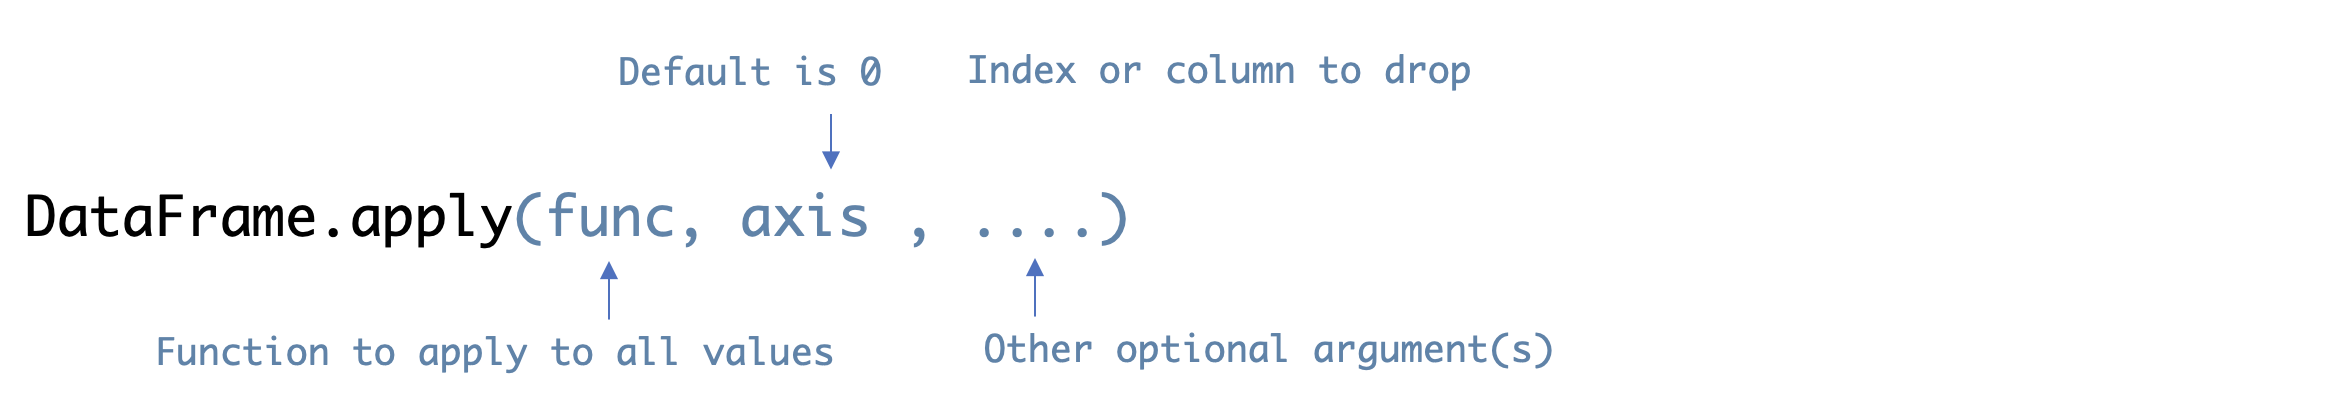

In [22]:
# Using apply and our defined function to remove the last character
countries_df['% of world'].apply(remove_pct)

0    17.80
1    17.50
2     4.20
3     3.42
4     2.84
5     2.70
6     2.67
7     2.17
8     1.84
9     1.59
Name: % of world, dtype: object

In [23]:
# Using apply and a lambda function to remove the last character
countries_df['% of world'].apply(lambda x: x[:-1])

0    17.80
1    17.50
2     4.20
3     3.42
4     2.84
5     2.70
6     2.67
7     2.17
8     1.84
9     1.59
Name: % of world, dtype: object

In [24]:
# reassigning the column
countries_df['% of world'] = countries_df['% of world'].apply(lambda x: x[:-1])

In [25]:
countries_df

Rank         Country    Region  Population % of world  \
0     1           China      Asia  1412600000      17.80   
1     2           India      Asia  1386946912      17.50   
2     3   United States  Americas   333073186       4.20   
3     4       Indonesia      Asia   271350000       3.42   
4     5        Pakistan      Asia   225200000       2.84   
5     6          Brazil  Americas   214231641       2.70   
6     7         Nigeria    Africa   211401000       2.67   
7     8      Bangladesh      Asia   172062576       2.17   
8     9          Russia    Europe   146171015       1.84   
9    10          Mexico  Americas   126014024       1.59   

   Population (millions)           Country / Region  
0                1412.60               China / Asia  
1                1386.95               India / Asia  
2                 333.07   United States / Americas  
3                 271.35           Indonesia / Asia  
4                 225.20            Pakistan / Asia  
5                 214.23          Brazil / Americas  
6                 211.40           Nigeria / Africa  
7                 172.06          Bangladesh / Asia  
8                 146.17            Russia / Europe  
9                 126.01          Mexico / Americas

In [26]:
countries_df.dtypes

Rank                       int64
Country                   object
Region                    object
Population                 int64
% of world                object
Population (millions)    float64
Country / Region          object
dtype: object

In [27]:
# Using apply and our defined function to remove the last character
countries_df['% of world'] = countries_df['% of world'].astype(float)

In [28]:
countries_df

Rank         Country    Region  Population  % of world  \
0     1           China      Asia  1412600000       17.80   
1     2           India      Asia  1386946912       17.50   
2     3   United States  Americas   333073186        4.20   
3     4       Indonesia      Asia   271350000        3.42   
4     5        Pakistan      Asia   225200000        2.84   
5     6          Brazil  Americas   214231641        2.70   
6     7         Nigeria    Africa   211401000        2.67   
7     8      Bangladesh      Asia   172062576        2.17   
8     9          Russia    Europe   146171015        1.84   
9    10          Mexico  Americas   126014024        1.59   

   Population (millions)           Country / Region  
0                1412.60               China / Asia  
1                1386.95               India / Asia  
2                 333.07   United States / Americas  
3                 271.35           Indonesia / Asia  
4                 225.20            Pakistan / Asia  
5                 214.23          Brazil / Americas  
6                 211.40           Nigeria / Africa  
7                 172.06          Bangladesh / Asia  
8                 146.17            Russia / Europe  
9                 126.01          Mexico / Americas

In [29]:
# calculating a new column
countries_df['World Pop']=countries_df['Population']/(countries_df['% of world']/100)

In [30]:
countries_df

Rank         Country    Region  Population  % of world  \
0     1           China      Asia  1412600000       17.80   
1     2           India      Asia  1386946912       17.50   
2     3   United States  Americas   333073186        4.20   
3     4       Indonesia      Asia   271350000        3.42   
4     5        Pakistan      Asia   225200000        2.84   
5     6          Brazil  Americas   214231641        2.70   
6     7         Nigeria    Africa   211401000        2.67   
7     8      Bangladesh      Asia   172062576        2.17   
8     9          Russia    Europe   146171015        1.84   
9    10          Mexico  Americas   126014024        1.59   

   Population (millions)           Country / Region     World Pop  
0                1412.60               China / Asia  7.935955e+09  
1                1386.95               India / Asia  7.925411e+09  
2                 333.07   United States / Americas  7.930314e+09  
3                 271.35           Indonesia / Asia  7.934211e+09  
4                 225.20            Pakistan / Asia  7.929577e+09  
5                 214.23          Brazil / Americas  7.934505e+09  
6                 211.40           Nigeria / Africa  7.917640e+09  
7                 172.06          Bangladesh / Asia  7.929151e+09  
8                 146.17            Russia / Europe  7.944077e+09  
9                 126.01          Mexico / Americas  7.925410e+09

In [31]:
# You can break down complex calculations into stages
# But variables require memory to store data
x = countries_df['Population']

In [32]:
y = (countries_df['% of world']/100)

In [33]:
countries_df['World Pop']=x/y

## Links and resources:
* Renaming columns: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
* Dropping columns: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
* astype: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
* NumPy datatypes: https://numpy.org/doc/stable/user/basics.types.html
* Python datatypes: https://docs.python.org/3/library/datatypes.html
* apply: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html